In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
moviesTest = pd.read_csv('Resources/test.csv')
moviesTrain = pd.read_csv('Resources/train.csv')
moviesTrain.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/2015,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/2004,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/2014,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/2012,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/2009,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
moviez = moviesTrain[moviesTrain.budget > 0]
movies = moviez[moviez.runtime > 0]


In [4]:
#change to yes or not format
movies.loc[movies["belongs_to_collection"].notnull(), "belongs_to_collection"]=1
movies["belongs_to_collection"]=movies["belongs_to_collection"].fillna(0)

movies.loc[movies["homepage"].notnull(), "homepage"]=1
movies["homepage"]=movies["homepage"].fillna(0)

movies.loc[movies["tagline"].notnull(), "tagline"]=1
movies["tagline"]=movies["tagline"].fillna(0)

movies.loc[movies["production_companies"].notnull(), "production_companies"]=1
movies["production_companies"]=movies["production_companies"].fillna(0)

movies.loc[movies["Keywords"].notnull(), "Keywords"]=1
movies["Keywords"]=movies["Keywords"].fillna(0)

movies.sort_values(by="budget", ascending=True).head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
849,850,0,1,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0,tt0027977,en,Modern Times,The Tramp struggles to live in modern industri...,8.159556,...,2/5/1936,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,Modern Times,1,"[{'cast_id': 8, 'character': 'A factory worker...","[{'credit_id': '5621aeadc3a3680e1d00a09a', 'de...",8500000
2255,2256,0,1,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0,tt0120836,en,Lost & Found,A comedy about finding your true love at any p...,1.337096,...,4/23/1999,95,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,Lost & Found,1,"[{'cast_id': 1, 'character': 'Dylan Ramsey', '...","[{'credit_id': '52fe47429251416c9106f659', 'de...",100
1346,1347,0,1,"[{'id': 18, 'name': 'Drama'}]",0,tt0048028,en,East of Eden,"In the Salinas Valley, in and around World War...",6.428830,...,3/9/1955,115,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,East of Eden,1,"[{'cast_id': 4, 'character': 'Caleb Trask', 'c...","[{'credit_id': '52fe4228c3a36847f800869d', 'de...",5
334,335,0,1,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,tt0376144,ta,Saamy,Saamy movie is all about Arusaamy (Vikram) who...,0.438490,...,5/5/2003,140,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,0,Saamy,0,"[{'cast_id': 11, 'character': 'Aaruchamy', 'cr...","[{'credit_id': '52fe4782c3a36847f813999f', 'de...",3
695,696,0,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",0,tt0374271,hi,Tere Naam,"Lower Caste Radhey Mohan is a no good slacker,...",1.280455,...,8/15/2003,132,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,1,Tere Naam,0,"[{'cast_id': 3, 'character': 'Radhe Mohan', 'c...","[{'credit_id': '52fe491ec3a36847f8189cfb', 'de...",2


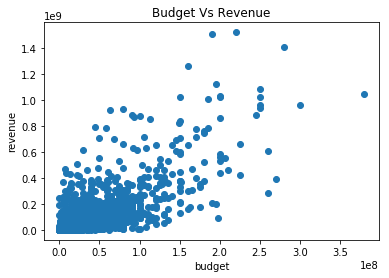

In [5]:
#plt.plot([0, 400000000], [0, 400000000], c="green")
# budge vs revenue
plt.scatter(movies.budget, movies.revenue)
#save figure
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Budget Vs Revenue")
plt.savefig("bud_v_rev")

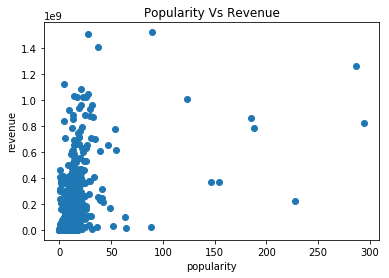

In [6]:
#Popularity vs Revenue
plt.scatter(movies.popularity, movies.revenue)
#save figure
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.title("Popularity Vs Revenue")
plt.savefig("pop_v_rev")

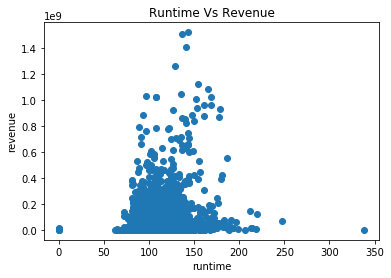

In [7]:
#runtime vs revenue
plt.scatter(movies.runtime, movies.revenue)
plt.title("Runtime Vs Revenue")
plt.xlabel("runtime")
plt.ylabel("revenue")
plt.savefig("runtime_v_revenue")

In [8]:
# Assign the data to X and y
X = movies[["budget", "popularity", "belongs_to_collection", "homepage", "tagline", "production_companies", "runtime", "Keywords"]]
y = movies["revenue"]
#X = movies.drop("popularity", axis=1)
#y = movies["popularity"]
print(X.shape, y.shape)

(2188, 8) (2188,)


In [9]:
#budget and popularity
movies.sort_values(by="budget", ascending=False).head(10)[["title", "budget", "release_date"]]

,title,budget,release_date
2135,Pirates of the Caribbean: On Stranger Tides,380000000,5/14/2011
2209,Pirates of the Caribbean: At World's End,300000000,5/19/2007
2770,Avengers: Age of Ultron,280000000,4/22/2015
1425,Superman Returns,270000000,6/28/2006
1630,Transformers: The Last Knight,260000000,6/21/2017
1270,John Carter,260000000,3/7/2012
961,Harry Potter and the Half-Blood Prince,250000000,7/7/2009
2532,The Hobbit: An Unexpected Journey,250000000,11/26/2012
906,The Dark Knight Rises,250000000,7/16/2012
666,The Hobbit: The Desolation of Smaug,250000000,12/11/2013


In [10]:
#revenue
movies.sort_values(by="revenue", ascending=False).head(10)[["title", "revenue", "release_date"]]

,title,revenue,release_date
1126,The Avengers,1519557910,4/25/2012
1761,Furious 7,1506249360,4/1/2015
2770,Avengers: Age of Ultron,1405403694,4/22/2015
684,Beauty and the Beast,1262886337,3/16/2017
2322,Transformers: Dark of the Moon,1123746996,6/28/2011
906,The Dark Knight Rises,1084939099,7/16/2012
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,5/14/2011
2562,Finding Dory,1028570889,6/16/2016
881,Alice in Wonderland,1025491110,3/3/2010
734,Zootopia,1023784195,2/11/2016


In [11]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)


In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = X_train
y_scaler = y_train


In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_train
X_test_scaled = X_test
y_train_scaled = y_train
y_test_scaled = y_test

In [14]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
model.score(X_test, y_test)

0.5778200128349373

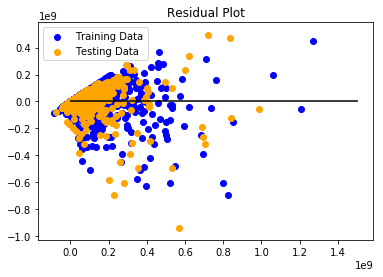

<Figure size 432x288 with 0 Axes>

In [16]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
#save figure
plt.savefig("bud_pop_vs_rev")

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate R2

r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Linear Model Score: {r2}")

Linear Model Score: 0.5778200128349373


In [18]:
#Lasso Model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"Lasso Model Score: {r2}")

Lasso Model Score: 0.5778200128258193


In [19]:
# Ridge model

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

#MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
#print(f"MSE: {MSE}, R2: {r2}")
print(f"Ridge Model Score: {r2}")

Ridge Model Score: 0.5778192864489872


C:\Users\JB52612\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.484422e-17
  overwrite_a=True).T


In [20]:
# ElasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

#MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"ElasticNet Model Score: {r2}")

ElasticNet Model Score: 0.5771973401806354


In [21]:
# Assign the data to X and y
#X = movies[["popularity", "revenue", "belongs_to_collection", "homepage", "tagline", "production_companies", "runtime"]]
#y = movies["budget"].values.reshape(-1, 1)
#X = movies.drop("popularity", axis=1)
#y = movies["popularity"]
#print(X.shape, y.shape)

In [22]:
moviesTest = pd.read_csv('Resources/test.csv')
moviesTest.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/2007,90,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/1958,65,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/1997,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/2010,130,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/2005,92,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [23]:
moviey = moviesTest[moviesTest.budget > 0]
moviesT = moviey[moviey.runtime > 0]

In [24]:
#change to yes or no format
moviesT.loc[moviesT["belongs_to_collection"].notnull(), "belongs_to_collection"]=1
moviesT["belongs_to_collection"]=moviesT["belongs_to_collection"].fillna(0)

moviesT.loc[moviesT["homepage"].notnull(), "homepage"]=1
moviesT["homepage"]=moviesT["homepage"].fillna(0)

moviesT.loc[moviesT["tagline"].notnull(), "tagline"]=1
moviesT["tagline"]=moviesT["tagline"].fillna(0)

moviesT.loc[moviesT["production_companies"].notnull(), "production_companies"]=1
moviesT["production_companies"]=moviesT["production_companies"].fillna(0)

moviesT.loc[moviesT["Keywords"].notnull(), "Keywords"]=1
moviesT["Keywords"]=moviesT["Keywords"].fillna(0)

moviesT.sort_values(by="budget", ascending=True).head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
2839,5840,0,1,"[{'id': 18, 'name': 'Drama'}]",1,tt1445208,en,The Letters,"MOTHER TERESA, recipient of the Nobel Peace Pr...",2.240259,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/4/2015,114,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0,The Letters,1,"[{'cast_id': 1, 'character': 'Benjamin Praagh'...","[{'credit_id': '52fe4e48c3a368484e218347', 'de..."
1048,4049,0,1,"[{'id': 35, 'name': 'Comedy'}]",1,tt1695765,en,Aquí Entre Nos,"Rodolfo Guerra, father of three daughters, wak...",0.230075,...,"[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",3/30/2012,73,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,1,Aquí Entre Nos,0,"[{'cast_id': 7, 'character': 'Rodolfo', 'credi...","[{'credit_id': '52fe4b5bc3a36847f81ffd37', 'de..."
4078,7079,0,1,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0,tt0093407,en,Less Than Zero,A college freshman returns to Los Angeles for ...,4.028679,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",11/6/1987,98,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,1,Less Than Zero,1,"[{'cast_id': 1, 'character': 'Clay Easton', 'c...","[{'credit_id': '52fe458e9251416c7505a9eb', 'de..."
1554,4555,0,1,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1,tt1436559,en,"Love, Wedding, Marriage",A happy newlywed marriage counselor's views on...,4.060122,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6/3/2011,90,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,"Love, Wedding, Marriage",1,"[{'cast_id': 1, 'character': 'Eva', 'credit_id...","[{'credit_id': '553fa28bc3a3682aed000035', 'de..."
830,3831,0,3,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",0,tt0104225,en,Falling From Grace,Rock singer John Mellencamp makes his screen a...,0.000001,...,NaN,2/21/1992,100,NaN,Released,0,Falling From Grace,0,"[{'cast_id': 2, 'character': 'Bud Parks', 'cre...","[{'credit_id': '52fe47e7c3a368484e0df9c5', 'de..."


In [25]:
features = ["budget", "popularity", "belongs_to_collection", "homepage", "tagline", "production_companies", "runtime", "Keywords"]
target = 'revenue'

In [26]:
predictions = model.predict(moviesT[features])
predictions

array([-45662264.66046964,  38509322.78312923, -12182498.58114479, ...,
        39585962.11884779,  26064375.89498413, -12670477.61338593])

In [27]:
final = pd.DataFrame()
final['title'] = moviesT['title']
final['revenue'] = predictions
pd.options.display.float_format = '{:.2f}'.format
final.to_csv("Rev_Predictions.csv", index=False)

In [30]:
df=pd.read_csv("Rev_Predictions.csv")

df.sort_values(by="revenue", ascending=False).head(10)

,title,revenue
2455,Minions,1834973211.46
2290,Avatar,1153491990.88
1146,Captain America: Civil War,1058210262.23
2165,Big Hero 6,986501839.33
1951,Pirates of the Caribbean: Dead Men Tell No Tales,967094415.51
575,The Hunger Games: Mockingjay - Part 1,772442608.13
3030,The Fate of the Furious,763092593.24
68,Spider-Man 3,719963654.72
2282,Batman v Superman: Dawn of Justice,719578561.28
2803,The Hobbit: The Battle of the Five Armies,716924639.00
